In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import classification_report, mean_squared_error

%matplotlib inline
sns.set(style="whitegrid")

print("Libraries loaded successfully.")


Libraries loaded successfully.


## Introduction to Decision Trees

Decision Trees are non-parametric models that split the data into regions using simple rules. They work for both:

- **Classification**: predicting discrete categories
- **Regression**: predicting continuous values

Advantages:
- Easy to interpret and visualize
- Can model non linear relationships
- Handle both numerical and categorical features

Disadvantages:
- Prone to overfitting
- Sensitive to small changes in the data


In [3]:
# Generate a simple classification dataset
X_cls, y_cls = make_classification(n_samples=300, n_features=5, n_informative=3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=1)

# Fit decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.80      0.84        54
           1       0.74      0.86      0.79        36

    accuracy                           0.82        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.83      0.82      0.82        90




## Visualizing a Classification Tree

The `plot_tree` function allows us to visualize the decisions being made at each node.


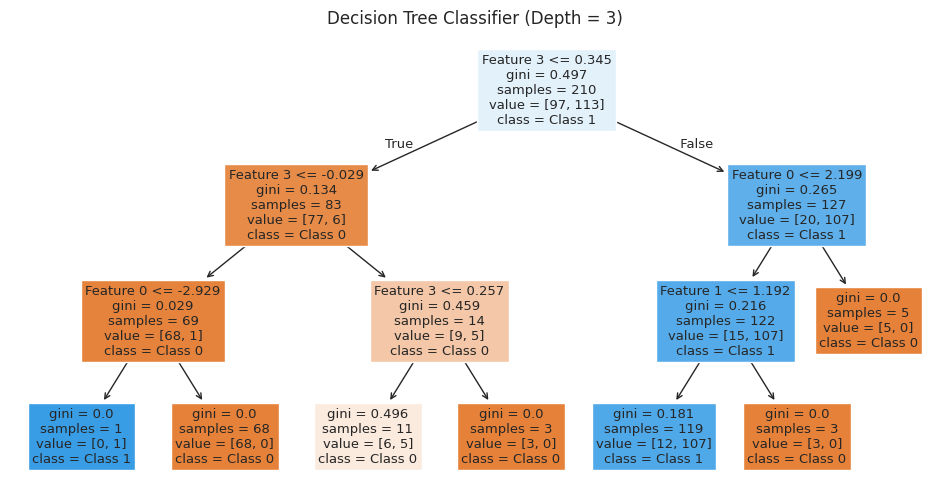

In [4]:
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=[f"Feature {i}" for i in range(X_cls.shape[1])], class_names=["Class 0", "Class 1"], filled=True)
plt.title("Decision Tree Classifier (Depth = 3)")
plt.show()



## Regression Trees

Regression Trees predict continuous values by partitioning the data and fitting a constant value (mean) in each region.

Unlike classification trees, their loss function is based on **Mean Squared Error (MSE)** instead of classification error.


In [5]:
# Generate synthetic regression dataset
X_reg, y_reg = make_regression(n_samples=300, n_features=4, noise=15.0, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Fit a regression tree
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(Xr_train, yr_train)

# Predict and evaluate
yr_pred = reg_tree.predict(Xr_test)
mse = mean_squared_error(yr_test, yr_pred)
print(f"Mean Squared Error (Test Set): {mse:.2f}")


Mean Squared Error (Test Set): 6609.06


## Boosting and AdaBoost

**Boosting** combines multiple weak learners into a strong one by training each new model to correct the errors of the previous.

- **AdaBoost** uses simple trees (depth=1 or 2) and adjusts weights based on past errors.
- Works well with binary classification and noisy data.

Boosting reduces **bias**, unlike bagging which reduces **variance**.


In [6]:
# Train AdaBoost using decision stumps (trees with depth=1)
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Evaluate performance
y_pred_ada = ada_clf.predict(X_test)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ada))


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.84      0.86      0.85        36

    accuracy                           0.88        90
   macro avg       0.87      0.88      0.87        90
weighted avg       0.88      0.88      0.88        90



## XGBoost (Extreme Gradient Boosting)

XGBoost is an optimized version of gradient boosting:
- Uses regularization to avoid overfitting
- Fast training and parallelizable
- Handles missing data and sparse inputs

It is one of the state of the art models 


In [7]:
# Train XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.78      0.89      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



/home/sandra-juarez/.local/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:22:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
